In [1]:
import sys;sys.path.append('../adcirc_swan')
import adcirc as adc;import regional as reg
import utils as ut;import pathlib as pl
#from importlib import reload
#from libs import *
from scipy.io import loadmat
import matplotlib.pyplot as plt;
import netCDF4 as nc4;import pandas as pd
import requests;import json;import matplotlib as mpl
import numpy as np

In [2]:
path = pl.Path('/Users/tmiesse/work/FHRL/arctic/model')

start = '20080722 00:30:00'
freq = '30min'

#### Find Observation Water Level Station

In [3]:

#names = np.array([name.tostring().strip() for name in nc_file.variables['station_name'][:].data[:]])

In [4]:
begin,end = '20080722','20080805'
station = '9497645'
noaa = json.loads(reg.noaa_data(begin,end,station,vdatum='MSL'))

#### Plot Water Level Obs vs. Model

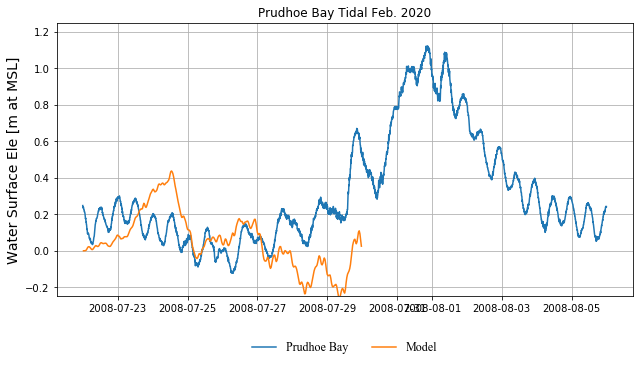

In [5]:
# initialize figure
fig = plt.figure(figsize=(8,4))
ax = plt.axes([0,0,1,.95])
plt.rcParams["font.family"] = "Times New Roman"
nc_file = nc4.Dataset(path  / 'newstorm' / 'fort.63.nc')
# plot data

ax.plot(pd.to_datetime([noaa['data'][i]['t'] for i in range(len(noaa['data']))]),
        [float(noaa['data'][i]['v']) for i in range(len(noaa['data']))],label=noaa['metadata']['name'])

node = ut.find_node_ak(nc_file,float(noaa['metadata']['lat']),float(noaa['metadata']['lon']))
ax.plot(pd.date_range(start=start,periods=int(len(nc_file.variables['zeta'][:,node])),freq=freq),
        nc_file.variables['zeta'][:,node],label='Model')

# annotate plot
ax.set_title('Prudhoe Bay Tidal Feb. 2020'),ax.set_ylabel(r'Water Surface Ele [m at MSL]',fontsize=14)
ax.set_ylim([-0.25,1.25])
#ax.set_xlim([pd.to_datetime('2008-07-24'),pd.to_datetime('2008-08-05')])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=2,frameon=False,fontsize=12)
ax.grid(True)
#plt.savefig('noaa_wave_buoy.png',dpi=450,bbox_inches = 'tight', pad_inches = 0.1),
plt.show()

#### 